:$$\Large \textit{C0708 | Reconocimiento de Patrones}$$


Autor: Jose Huaylinos, Alvaro Segura


$$\large \textbf{Challenge 3°| Training y Testing, Overfitting, regularization, Support Vector Machines}$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQsmhJcSUEhVz0LNxgSVziXrkXgOHXSx08UBnwLyNhJWdt9OcF0Ma0SV1_Isdzzw397k7G_7mg06ArW/pub?gid=369369926&single=true&output=csv")

<center><h2>Analisis exploratorio de los datos</h2></center>






**Análisis  de los datos**

In [ ]:
X = df.drop("prognosis", axis=1)
y = df["prognosis"]
df.shape

(707, 66)

In [ ]:
# Feature names
feature_names = X.columns.to_list()
formatted_features = ", ".join(feature_names)
output_features_string = f"Los features de la base de datos son los siguientes:\n {formatted_features}."
# Target name
target_name = y.name
output_target_string = f"El target de la base de datos es el siguiente:\n  {target_name}."
# Combinar las dos cadenas con un salto de línea entre ellas
result_string = f"{output_features_string}\n{output_target_string}"
print(result_string)

Los features de la base de datos son los siguientes:
 id, sudden_fever, headache, mouth_bleed, nose_bleed, muscle_pain, joint_pain, vomiting, rash, diarrhea, hypotension, pleural_effusion, ascites, gastro_bleeding, swelling, nausea, chills, myalgia, digestion_trouble, fatigue, skin_lesions, stomach_pain, orbital_pain, neck_pain, weakness, back_pain, weight_loss, gum_bleed, jaundice, coma, diziness, inflammation, red_eyes, loss_of_appetite, urination_loss, slow_heart_rate, abdominal_pain, light_sensitivity, yellow_skin, yellow_eyes, facial_distortion, microcephaly, rigor, bitter_tongue, convulsion, anemia, cocacola_urine, hypoglycemia, prostraction, hyperpyrexia, stiff_neck, irritability, confusion, tremor, paralysis, lymph_swells, breathing_restriction, toe_inflammation, finger_inflammation, lips_irritation, itchiness, ulcers, toenail_loss, speech_problem, bullseye_rash.
El target de la base de datos es el siguiente:
  prognosis.


In [ ]:
# Check valores nulos en la base de datos
missing_values = df.isnull().sum()
print( "El número de valores nulos en la base de datos es : " + str(len(missing_values[missing_values > 0])))


El número de valores nulos en la base de datos es : 0


Distribución de la variable target

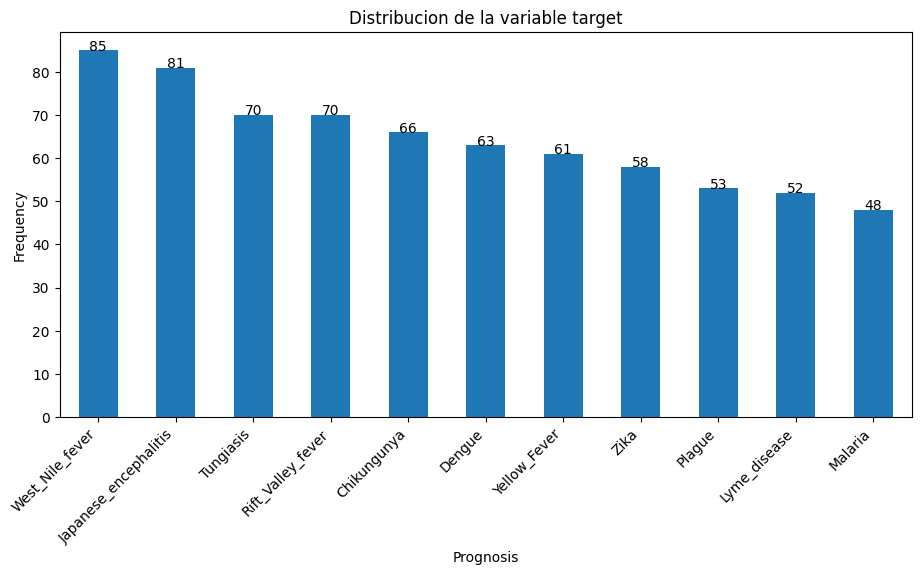

In [ ]:
plt.figure(figsize=(11, 5))
ax = df['prognosis'].value_counts().plot(kind='bar')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Distribucion de la variable target')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Correlación de variables :

El mapa de calor visualiza la matriz de correlación de las características del conjunto de datos, excluyendo "id" y "pronóstico".
Los valores de correlación varían de -1 a 1:

*   Un valor cercano a 1 implica una fuerte correlación positiva: a medida que una variable aumenta, la otra variable tiende a aumentar también.
*   Un valor cercano a -1 implica una fuerte correlación negativa: a medida que una variable aumenta, la otra tiende a disminuir.
*   Un valor cercano a 0 implica que no hay correlación: los cambios en una variable no predicen cambios en la otra variable.






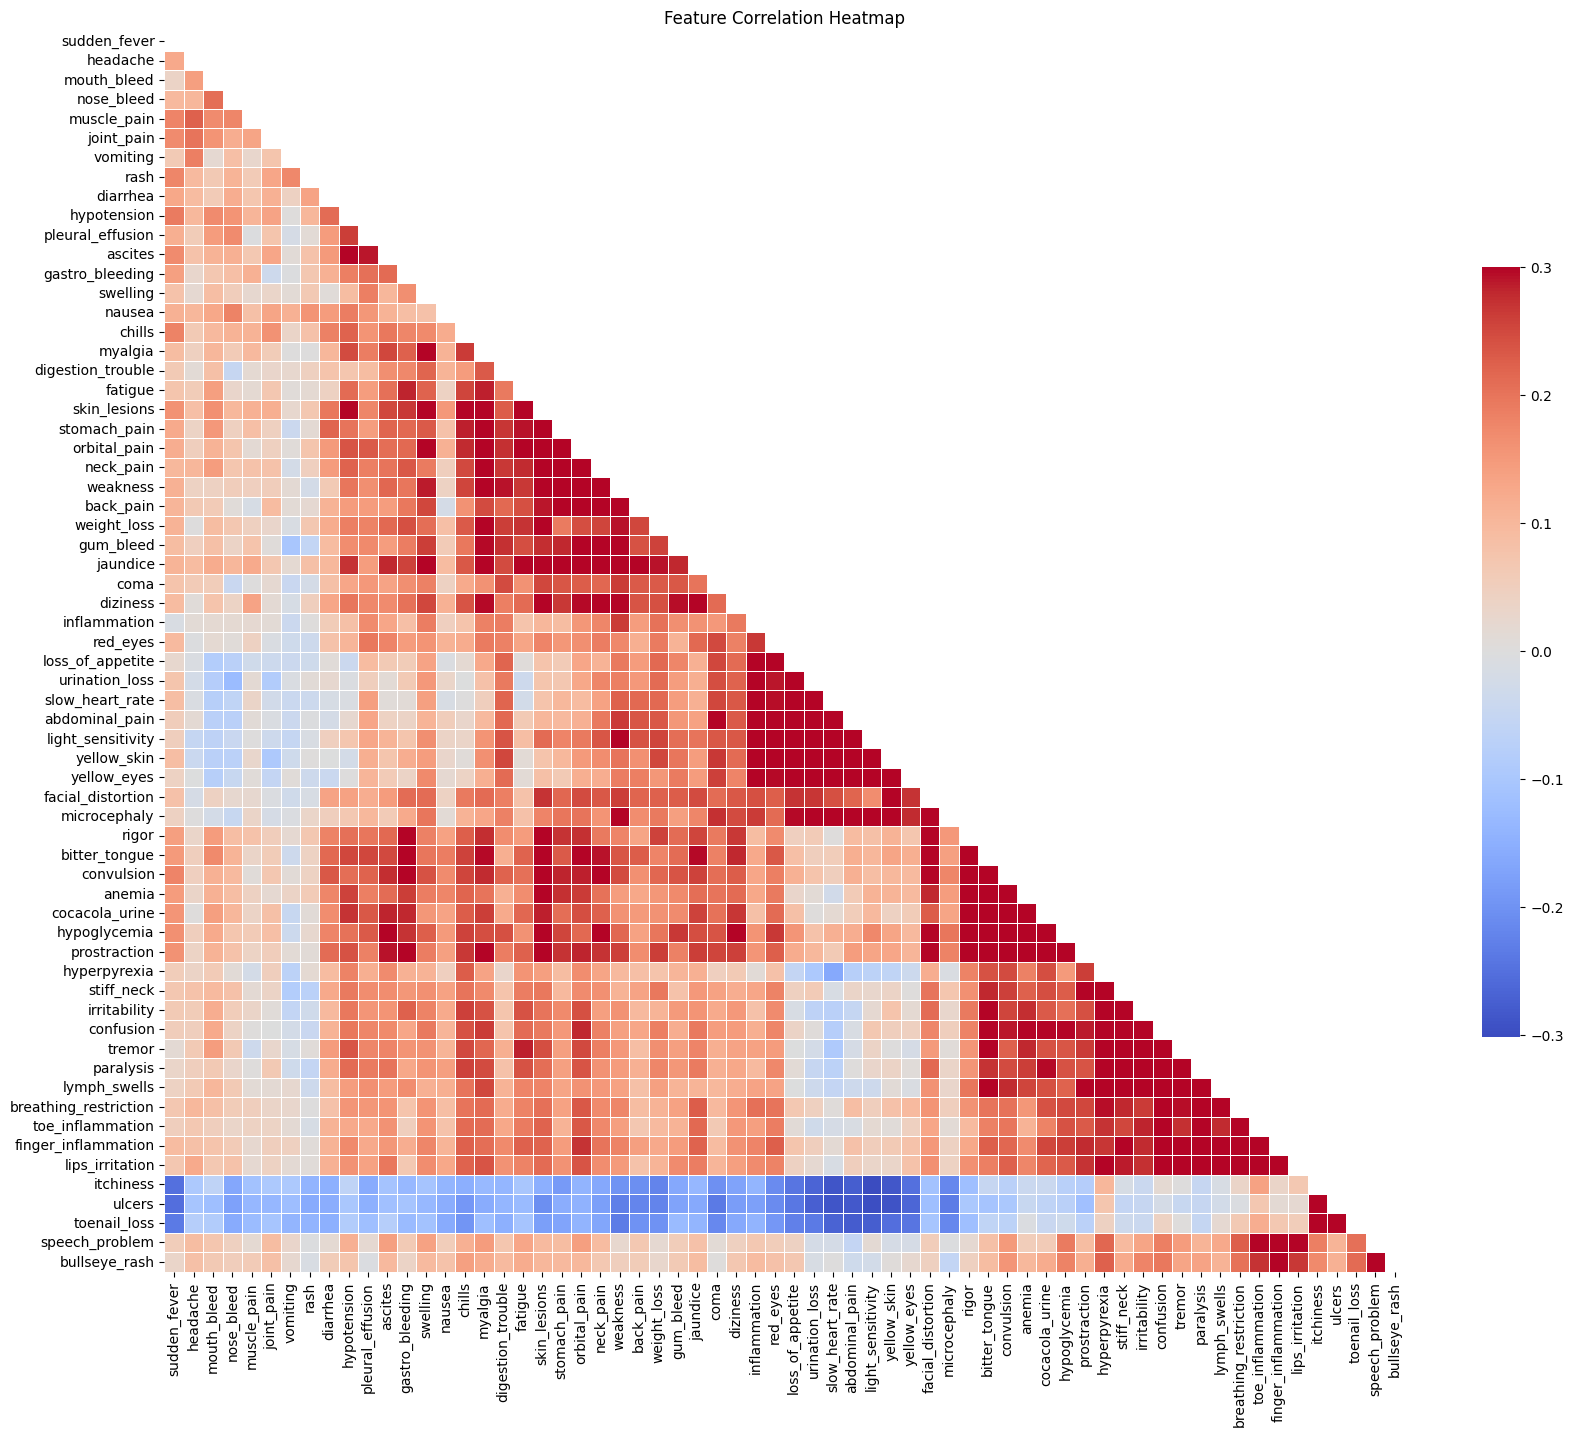

In [ ]:
import seaborn as sns
import numpy as np
# Compute the correlation matrix (excluding 'id' and 'prognosis')
corr_matrix = df.drop(columns=['id', 'prognosis']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

<center><h2>Procesamiento de los Datos</h2></center>

Se eliminará la variable 'id' y además se utilizará oversampling con SMOTE para así realizar el balanceo de las categorías

In [ ]:
# Drop the 'id' column
X.drop('id', axis=1, inplace=True)

Aplicando Oversampling

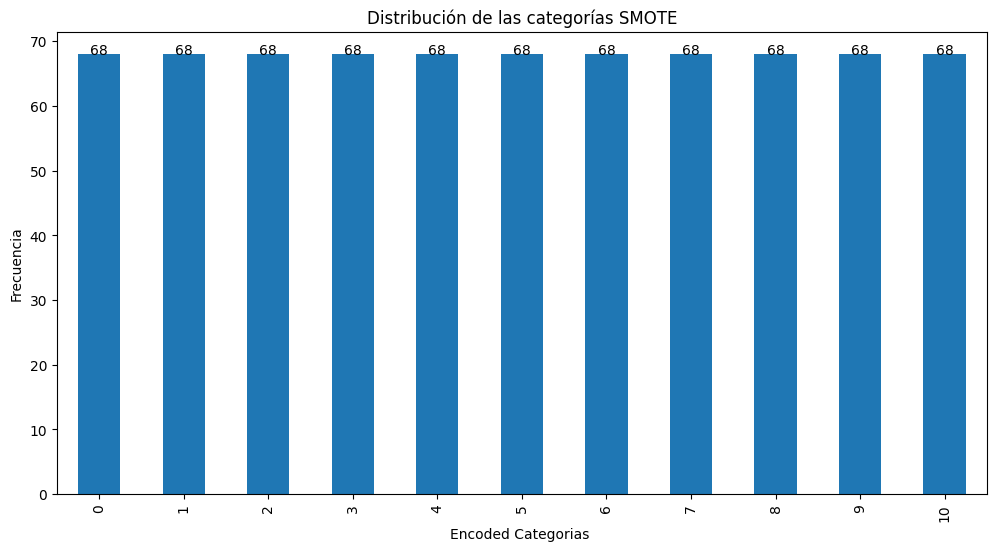

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
# Creando el encoder
label_encoder = LabelEncoder()
# Transformado la variable target
label_encoder.fit(y)
y_new_encoded = label_encoder.transform(y)
# Dividiendo la data en conjunto de entrenamiento y teste
X_train, X_test, y_train, y_test = train_test_split(X, y_new_encoded, test_size=0.2, random_state=42, stratify=y_new_encoded)
# Aplicando el algoritmo SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
# Ploteo
for i, value in enumerate(pd.Series(y_train_smote).value_counts().sort_index()):
    plt.text(i, value, str(value), ha='center')
plt.title('Distribución de las categorías SMOTE')
plt.xlabel('Encoded Categorias ')
plt.ylabel('Frecuencia')
plt.show()

Imprimiendo las categorias

In [ ]:
original_classes = label_encoder.classes_
class_mapping = {i: original_class for i, original_class in enumerate(original_classes)}
# Print the mapping between encoded integers and original class names
for encoded, original in class_mapping.items():
    print(f"{encoded} : {original}")

0 : Chikungunya
1 : Dengue
2 : Japanese_encephalitis
3 : Lyme_disease
4 : Malaria
5 : Plague
6 : Rift_Valley_fever
7 : Tungiasis
8 : West_Nile_fever
9 : Yellow_Fever
10 : Zika


Dividiendo el conjunto de entrenamiento y testo sin utilizar oversampling

In [ ]:
from sklearn.model_selection import train_test_split
# Separando las variables
X = df.drop('prognosis', axis=1)
y = df['prognosis']
# Creando el encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((565, 65), (142, 65), (565,), (142,))

<center><h2>Utilizando algoritmos de clasificación y analizando las métricas</h2></center>

Se utilizará los algoritmos de Suppor Vector Machine y de k-nearest neighbor, cada uno con y sin OVERSAMPLING

SVM con OVERSAMPLING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Inicializando el algoritm
svm = SVC(kernel='linear', C=2)
# Entrenamiento del modelo
svm.fit(X_train_smote, y_train_smote)
# Evaluando el conjunto de testeo
y_pred = svm.predict(X_test)
# Evaluando el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2887323943661972
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.24      0.31      0.27        13
           2       0.21      0.25      0.23        16
           3       0.24      0.40      0.30        10
           4       0.43      0.30      0.35        10
           5       0.22      0.18      0.20        11
           6       0.33      0.14      0.20        14
           7       0.47      0.50      0.48        14
           8       0.00      0.00      0.00        17
           9       0.10      0.08      0.09        12
          10       0.18      0.17      0.17        12

    accuracy                           0.29       142
   macro avg       0.27      0.30      0.27       142
weighted avg       0.26      0.29      0.27       142



SVM sin OVERSAMPLING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Inicializando el algoritm
svm = SVC(kernel='linear', C=2)
# Entrenamiento del modelo
svm.fit(X_train, y_train)
# Evaluando el conjunto de testeo
y_pred = svm.predict(X_test)
# Evaluando el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2676056338028169
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.92      0.73        13
           1       0.24      0.31      0.27        13
           2       0.17      0.19      0.18        16
           3       0.25      0.40      0.31        10
           4       0.50      0.40      0.44        10
           5       0.11      0.09      0.10        11
           6       0.17      0.07      0.10        14
           7       0.44      0.50      0.47        14
           8       0.00      0.00      0.00        17
           9       0.11      0.08      0.10        12
          10       0.08      0.08      0.08        12

    accuracy                           0.27       142
   macro avg       0.24      0.28      0.25       142
weighted avg       0.23      0.27      0.24       142



KNN con OVERSAMPLING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creando el algoritmo
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
# Entrenando el modelo utilizando el conjunto de entrenamiento
knn.fit(X_train_smote, y_train_smote)
# Prediciendo las variables
y_pred = knn.predict(X_test)
# Evaluando el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.176056338028169
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.62      0.30        13
           1       0.16      0.23      0.19        13
           2       0.17      0.06      0.09        16
           3       0.24      0.40      0.30        10
           4       0.00      0.00      0.00        10
           5       0.10      0.09      0.10        11
           6       0.11      0.07      0.09        14
           7       0.18      0.14      0.16        14
           8       0.25      0.06      0.10        17
           9       0.14      0.08      0.11        12
          10       0.30      0.25      0.27        12

    accuracy                           0.18       142
   macro avg       0.17      0.18      0.15       142
weighted avg       0.17      0.18      0.15       142



KNN sin OVERSAMPLING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
# Entrenando el modelo utilizando el conjunto de entrenamiento
knn.fit(X_train, y_train)
# Prediciendo las variables
y_pred = knn.predict(X_test)
# Evaluando el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.176056338028169
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.62      0.24        13
           1       0.20      0.23      0.21        13
           2       0.25      0.19      0.21        16
           3       0.30      0.30      0.30        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        11
           6       0.12      0.07      0.09        14
           7       0.11      0.07      0.09        14
           8       0.14      0.06      0.08        17
           9       0.17      0.17      0.17        12
          10       0.43      0.25      0.32        12

    accuracy                           0.18       142
   macro avg       0.17      0.18      0.16       142
weighted avg       0.17      0.18      0.16       142



*Análisis de resultados*

<!DOCTYPE html>
<html>
<head>
</head>
<body>

<h2>Análisis Detallado de Métricas</h2>

<h3>Support Vector Machine (SVM)</h3>

<h4>Con Oversampling:</h4>
<ul>
    <li><strong>Accuracy:</strong> 0.29</li>
    <li><strong>Recall promedio:</strong> 0.30</li>
    <li><strong>Precision promedio:</strong> 0.27</li>
</ul>

<h4>Sin Oversampling (SMOTE):</h4>
<ul>
    <li><strong>Accuracy:</strong> 0.27</li>
    <li><strong>Recall promedio:</strong> 0.28</li>
    <li><strong>Precision promedio:</strong> 0.24</li>
</ul>

<h4>Observaciones SVM:</h4>
<p>El modelo sin oversampling tiene una precisión ligeramente mayor (0.27 vs 0.29). El recall y la precisión son similares en ambos casos, aunque ligeramente mayores en el modelo sin oversampling.</p>

<h3>K-Nearest Neighbors (KNN)</h3>

<h4>Sin Oversampling:</h4>
<ul>
    <li><strong>Accuracy:</strong> 0.176</li>
    <li><strong>Recall promedio:</strong> 0.18</li>
    <li><strong>Precision promedio:</strong> 0.17</li>
</ul>

<h4>Con Oversampling (SMOTE):</h4>
<ul>
    <li><strong>Accuracy:</strong> 0.176</li>
    <li><strong>Recall promedio:</strong> 0.18</li>
    <li><strong>Precision promedio:</strong> 0.17</li>
</ul>

<h4>Observaciones KNN:</h4>
<p>Las métricas son idénticas tanto con oversampling como sin él, lo que es bastante inusual pero podría indicar que el oversampling no tiene un impacto significativo en el rendimiento del modelo KNN en este caso.</p>

<h3>Comparación Global:</h3>

<ul>
    <li><strong>SVM vs KNN:</strong> En términos de precisión, recall y precisión promedio, SVM supera claramente a KNN en este conjunto de datos, tanto con oversampling como sin él.</li>
    <li><strong>Oversampling:</strong> El oversampling no mejora significativamente las métricas en ninguno de los dos modelos.</li>
</ul>

<h3>Recomendaciones:</h3>

<ol>
    <li><strong>Modelo a Elegir:</strong> Basándonos en las métricas, SVM parece ser el modelo más adecuado para este conjunto de datos.</li>
    <li><strong>Oversampling:</strong> Dado que el oversampling no ha mejorado el rendimiento, podrías continuar sin usarlo o intentar técnicas de submuestreo o métodos de selección de características para mejorar el rendimiento.</li>
    <li><strong>Optimización de Parámetros:</strong> Podrías también intentar optimizar los parámetros de los modelos para mejorar las métricas.</li>
</ol>

</body>
</html>
